This notebook follows our method of ICA ordering, but instead uses our 1d ${C}_{IV}$ analysis to order our objects

Go to notebook 'RM_CIV_fit' in this folder of the repository to see how our objects were ordered

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import astropy
from astropy.io import fits
from astropy.table import Table
import richardsplot
import sklearn

In [2]:
infile = 'SpringFinalFigs_moreParams.csv'
df = pd.read_csv(infile)

#Parameters to test
uniform = df[['UNI_FLAG']].values
Miz2 = df[['MI_Z2']].values
det = df[['detection']].values
peak_flux = df[['peak_flux']].values
int_flux = np.log10(df[['int_flux']].values)
logL_rad = df[['L_rad']].values
aro = df[['alpha_ro']].values
ew_civ = df[['EW_CIV_2']].values
voff_civ = df[['VOFF_CIV_PEAK_2']].values
log_bh = df[['LOGBH']].values
logedd_ratio = df[['LOGEDD_RATIO']].values
logL_bol = df[['LOGLBOL']].values
logL_civ = df[['LOGL_CIV']].values
fwhm_civ = df[['FWHM_CIV']].values

#Contains location along CIV fit
infile2 = 'SDSSRM_CIVdist.csv'
df2 = pd.read_csv(infile2)
nsdist = df2[['Q_CIV_NOSCALE']].values
sdist = df2[['Q_CIV_SCALE']].values

In [3]:
detect = det>0
ndetect = det<0
dMask = [detect, ndetect]

#Can change RL parameters here
#RLpar = "Flux"
#RQ = (detect)&(10.**int_flux<229)
#RL = (detect)&(10.**int_flux>229)

RLpar = "$\\alpha_{ro}$"
RQ = (detect)&(aro>-0.2)
RL = (detect)&(aro<-0.2)

RLmask = [RQ, RL]

---
### Do unscaled data first

In [4]:
print("Min Quad:", min(nsdist))
print("Max Quad:", max(nsdist))

Min Quad: [0.]
Max Quad: [14.]


In [5]:
B0 = (nsdist==0)
B1 = (nsdist==1)
B2 = (nsdist==2)
B3 = (nsdist==3)
B4 = (nsdist==4)
B5 = (nsdist==5)
B6 = (nsdist==6)
B7 = (nsdist==7)
B8 = (nsdist==8)
B9 = (nsdist==9)
B10 = (nsdist==10)
B11 = (nsdist==11)
B12 = (nsdist==12)
B13 = (nsdist==13)
B14 = (nsdist==14)
Bins = [B0,B1,B2,B3,B4,B5,B6,B7,B8,B9,B10,B11,B12,B13,B14] #put in list to be somewhat concise going forward
for x in range(len(Bins)): print("Bin {} has {} objects".format(x, Bins[x].sum()))

Bin 0 has 1 objects
Bin 1 has 0 objects
Bin 2 has 0 objects
Bin 3 has 0 objects
Bin 4 has 0 objects
Bin 5 has 1 objects
Bin 6 has 0 objects
Bin 7 has 4 objects
Bin 8 has 8 objects
Bin 9 has 9 objects
Bin 10 has 9 objects
Bin 11 has 4 objects
Bin 12 has 8 objects
Bin 13 has 0 objects
Bin 14 has 6 objects


Combine bins 0-6

In [6]:
B0 = (0<=nsdist)&(nsdist<=6)
B1 = (nsdist==7)
B2 = (nsdist==8)
B3 = (nsdist==9)
B4 = (nsdist==10)
B5 = (nsdist==11)
B6 = (nsdist==12)
B7 = (nsdist==13)
B8 = (nsdist==14)
Bins = [B0,B1,B2,B3,B4,B5,B6,B7,B8] #put in list to be somewhat concise going forward
labels = np.array(['B0','B1','B2','B3','B4','B5','B6','B7','B8'])
for x in range(len(Bins)): print("Bin {} has {} objects".format(x, Bins[x].sum()))

Bin 0 has 2 objects
Bin 1 has 4 objects
Bin 2 has 8 objects
Bin 3 has 9 objects
Bin 4 has 9 objects
Bin 5 has 4 objects
Bin 6 has 8 objects
Bin 7 has 0 objects
Bin 8 has 6 objects


/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


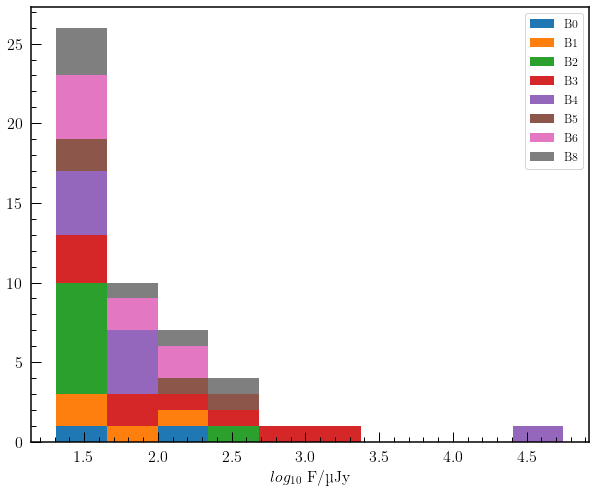

In [7]:
def order_civ(var, B): #condense graphs, should have done this in other notebooks too
    ordered_dist = []
    for i in range(len(B)):
        ordered_dist.append(var[B[i]])

    mask = []
    for x in ordered_dist:
        if x.size != 0: mask.append(1)
        else: mask.append(0)
    mask = (np.array(mask) != 0)
    return np.array(ordered_dist), mask
    
ordciv_intflux, mask = order_civ(int_flux, Bins)
plt.figure(figsize=(10,8))
plt.hist(ordciv_intflux[mask], stacked=True, label=labels[mask])
plt.xlabel("$log_{10}$ F/µJy")
plt.legend(loc="best")

#plt.savefig("../Graphs/RM_CIV_Ordering/unscaled_bins.png")

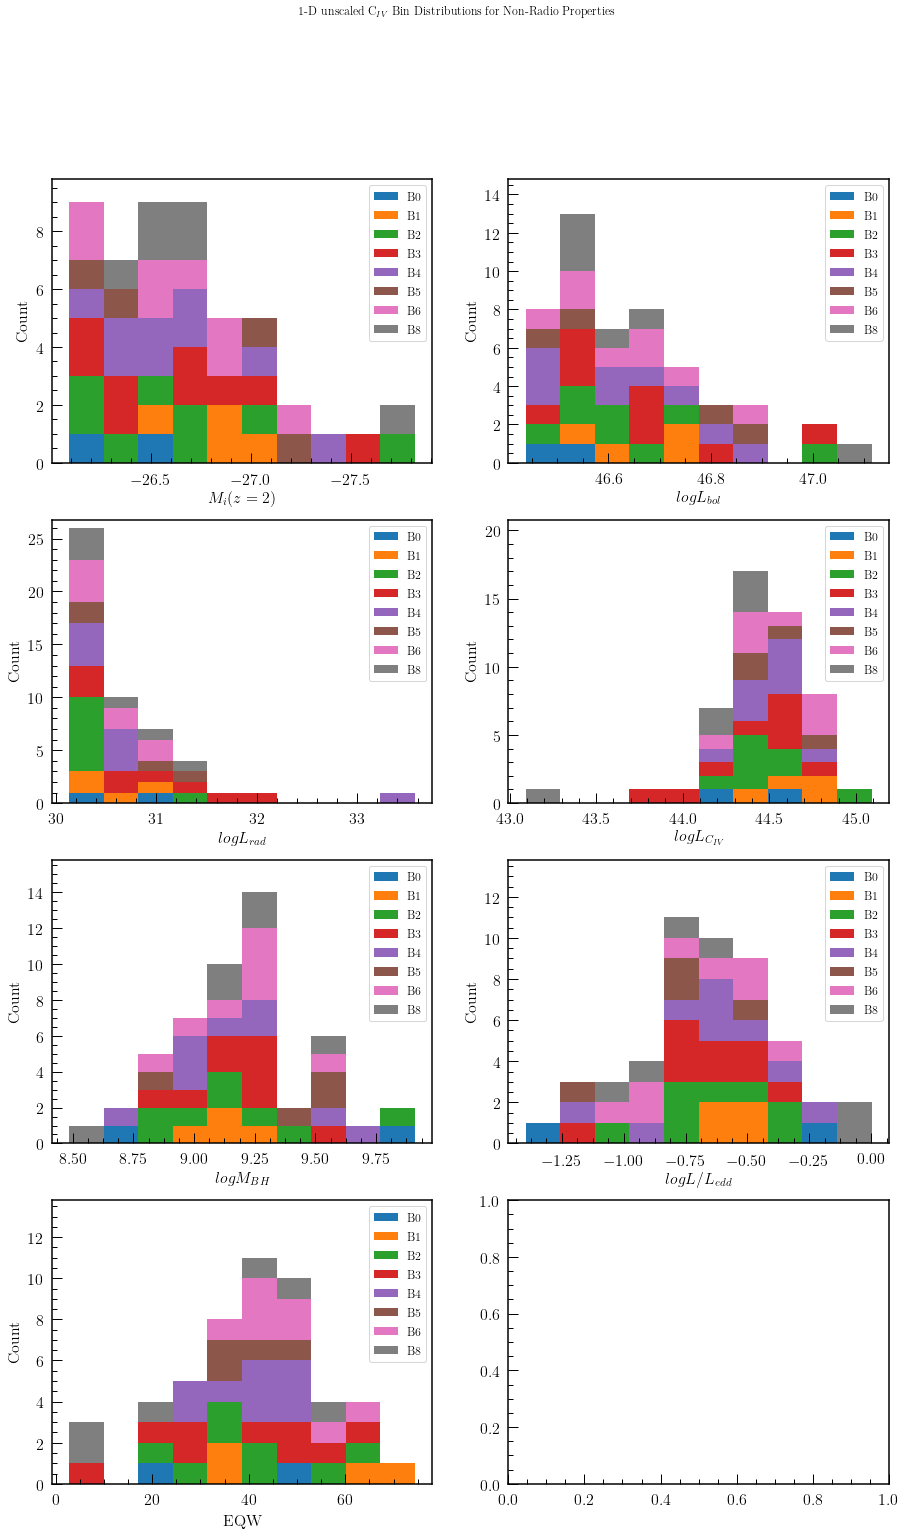

In [8]:
fig, axs = plt.subplots(4, 2, figsize=(15,24))
plt.suptitle('1-D unscaled C$_{IV}$ Bin Distributions for Non-Radio Properties')

axs[0,0].hist(order_civ(Miz2, Bins)[0][mask], stacked=True, label=labels[mask])
axs[0,0].set_xlabel('$M_i(z=2)$')
axs[0,0].invert_xaxis()
axs[0,0].set_ylabel('Count')
axs[0,0].set_ylim(0, 9.8)
axs[0,0].legend(loc="best")

axs[0,1].hist(order_civ(logL_bol, Bins)[0][mask], stacked=True, label=labels[mask])
axs[0,1].set_xlabel('$log L_{bol}$')
axs[0,1].set_ylabel('Count')
axs[0,1].set_ylim(0, 14.8)
axs[0,1].legend(loc="best")

axs[1,0].hist(order_civ(logL_rad, Bins)[0][mask], stacked=True, label=labels[mask])
axs[1,0].set_xlabel('$log L_{rad}$')
axs[1,0].set_ylabel('Count')
axs[1,0].set_ylim(0, 26.8)
axs[1,0].legend(loc="best")

axs[1,1].hist(order_civ(logL_civ, Bins)[0][mask], stacked=True, label=labels[mask])
axs[1,1].set_xlabel('$log L_{C_{IV}}$')
axs[1,1].set_ylabel('Count')
axs[1,1].set_ylim(0, 20.8)
axs[1,1].legend(loc="best")

axs[2,0].hist(order_civ(log_bh, Bins)[0][mask], stacked=True, label=labels[mask])
axs[2,0].set_xlabel('$log M_{BH}$')
axs[2,0].set_ylabel('Count')
axs[2,0].set_ylim(0, 15.8)
axs[2,0].legend(loc="best")

axs[2,1].hist(order_civ(logedd_ratio, Bins)[0][mask], stacked=True, label=labels[mask])
axs[2,1].set_xlabel('$log L/L_{edd}$')
axs[2,1].set_ylabel('Count')
axs[2,1].set_ylim(0, 13.8)
axs[2,1].legend(loc="best")


axs[3,0].hist(order_civ(ew_civ, Bins)[0][mask], stacked=True, label=labels[mask])
axs[3,0].set_xlabel('EQW')
axs[3,0].set_ylabel('Count')
axs[3,0].set_ylim(0, 13.8)
axs[3,0].legend(loc="best")

#plt.savefig('../Graphs/RM_CIV_Ordering/unscaled_demographics.png')

In [9]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [10]:
def binplot(ax, var, splits, xlabel='', invx=False, sound=False):
    for i in range(len(splits)):
        if splits[i].sum() != 0: #only plot bins with objects in them, like above
            if sound: #RL/RQ comparison
                ax[0].scatter(var[splits[i]&RL], int_flux[splits[i]&RL], facecolors="None", edgecolors=colors[i])
                ax[0].scatter(var[splits[i]&RQ], int_flux[splits[i]&RQ], color=colors[i], label=labels[i])
                ax[1].scatter(var[splits[i]&RL], aro[splits[i]&RL], facecolors="None", edgecolors=colors[i])
                ax[1].scatter(var[splits[i]&RQ], aro[splits[i]&RQ], color=colors[i], label=labels[i])
            else:
                ax[0].scatter(var[splits[i]&ndetect], int_flux[splits[i]&ndetect], facecolors="None", edgecolors="grey", marker='v')
                ax[0].scatter(var[splits[i]&detect], int_flux[splits[i]&detect], label=labels[i])
                ax[1].scatter(var[splits[i]&ndetect], aro[splits[i]&ndetect], facecolors="None", edgecolors="grey", marker='v')
                ax[1].scatter(var[splits[i]&detect], aro[splits[i]&detect], label=labels[i])

    if invx: 
        ax[0].invert_xaxis()
        ax[1].invert_xaxis()
    ax[0].set_ylabel('$log_{10} (F / \mu Jy)$')
    ax[0].set_xlabel(xlabel)
    ax[0].legend(loc="best")
    ax[1].invert_yaxis()
    ax[1].set_ylabel('$\\alpha_{ro}$')
    ax[1].set_xlabel(xlabel)
    ax[1].legend(loc="best")

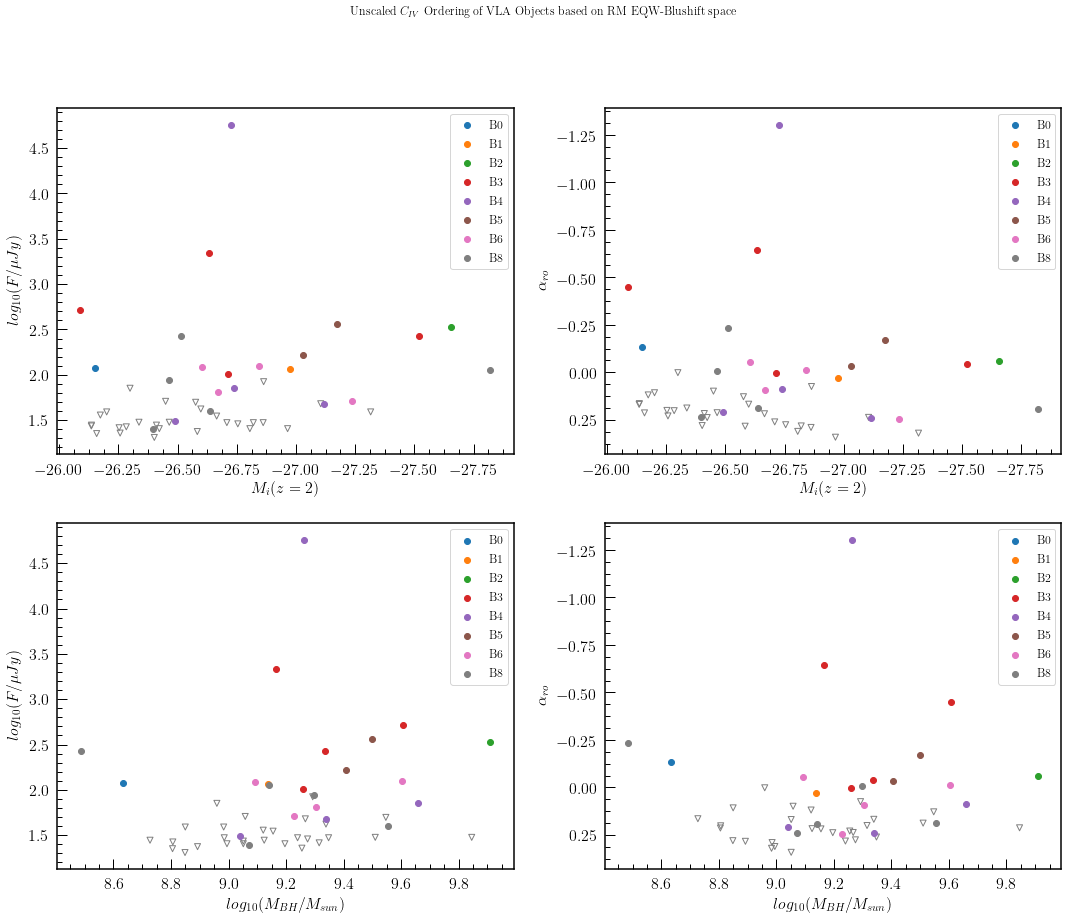

In [11]:
fig, axs = plt.subplots(2, 2, figsize=(18,14))
plt.suptitle("Unscaled $C_{IV}$ Ordering of VLA Objects based on RM EQW-Blushift space")

binplot([axs[0,0], axs[0,1]], Miz2, Bins,'$M_i(z=2)$', True)
binplot([axs[1,0], axs[1,1]], log_bh, Bins, '$log_{10} (M_{BH} / M_{sun})$')

#plt.savefig("../Graphs/RM_CIV_Ordering/civorder_unscaled_Miz2_and_Mbh_alldata.png")

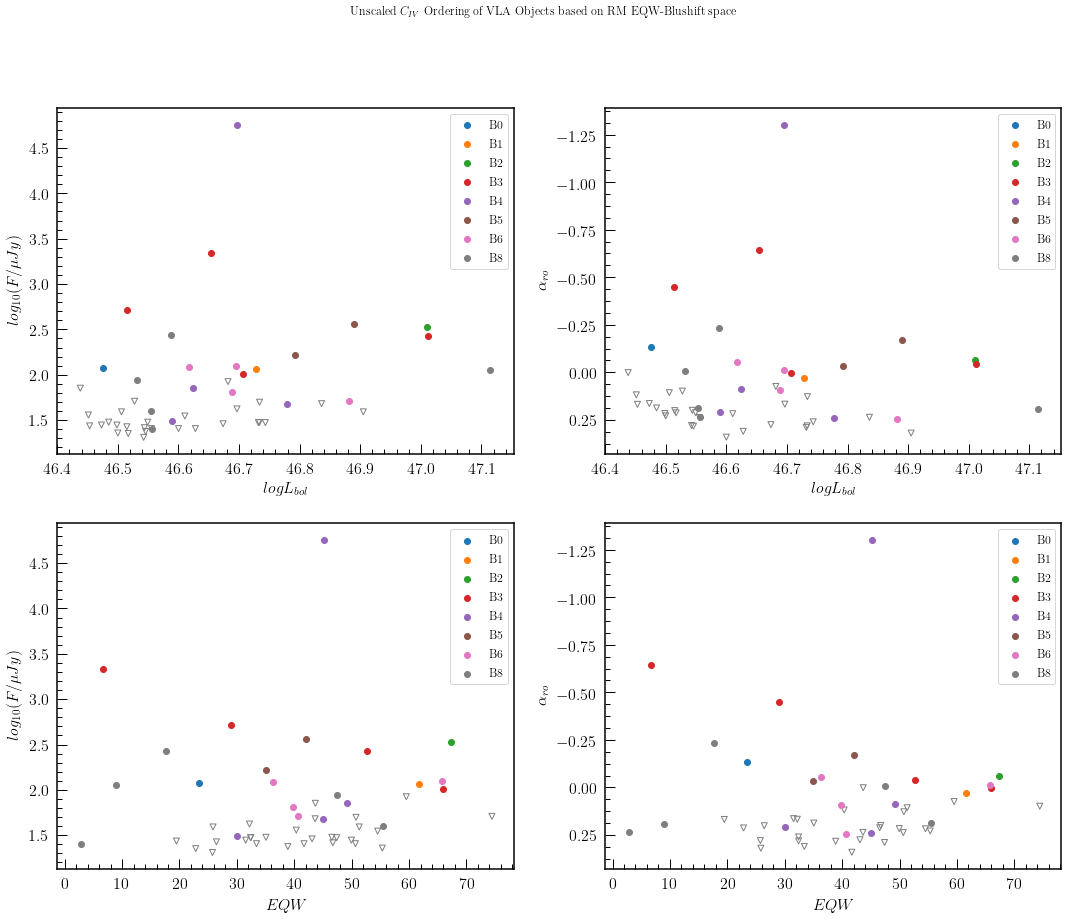

In [12]:
fig, axs = plt.subplots(2, 2, figsize=(18,14))
plt.suptitle("Unscaled $C_{IV}$ Ordering of VLA Objects based on RM EQW-Blushift space")

binplot([axs[0,0], axs[0,1]], logL_bol, Bins, '$log L_{bol}$')
binplot([axs[1,0], axs[1,1]], ew_civ, Bins, '$EQW$')

#plt.savefig("../Graphs/RM_CIV_Ordering/civorder_unscaled_Lbol_and_EQW_alldata.png")

---

### Now do analysis with scaled data

In [13]:
print("Min Quad:", min(sdist))
print("Max Quad:", max(sdist))

Min Quad: [0.]
Max Quad: [8.]


In [14]:
b0 = (sdist==0)
b1 = (sdist==1)
b2 = (sdist==2)
b3 = (sdist==3)
b4 = (sdist==4)
b5 = (sdist==5)
b6 = (sdist==6)
b7 = (sdist==7)
b8 = (sdist==8)
bins = [b0,b1,b2,b3,b4,b5,b6,b7,b8] #put in list to be somewhat concise going forward
for x in range(len(bins)): print("Bin {} has {} objects".format(x, bins[x].sum()))

Bin 0 has 1 objects
Bin 1 has 0 objects
Bin 2 has 0 objects
Bin 3 has 0 objects
Bin 4 has 1 objects
Bin 5 has 13 objects
Bin 6 has 17 objects
Bin 7 has 12 objects
Bin 8 has 6 objects


Combine two 'leftmost' objects, re-index bins

In [15]:
b0 = (0<=sdist)&(sdist<=4)
b1 = (sdist==5)
b2 = (sdist==6)
b3 = (sdist==7)
b4 = (sdist==8)
bins = [b0,b1,b2,b3,b4] #put in list to be somewhat concise going forward
labels = np.array(['B0','B1','B2','B3','B4'])
for x in range(len(bins)): print("Bin {} has {} objects".format(x, bins[x].sum()))

Bin 0 has 2 objects
Bin 1 has 13 objects
Bin 2 has 17 objects
Bin 3 has 12 objects
Bin 4 has 6 objects


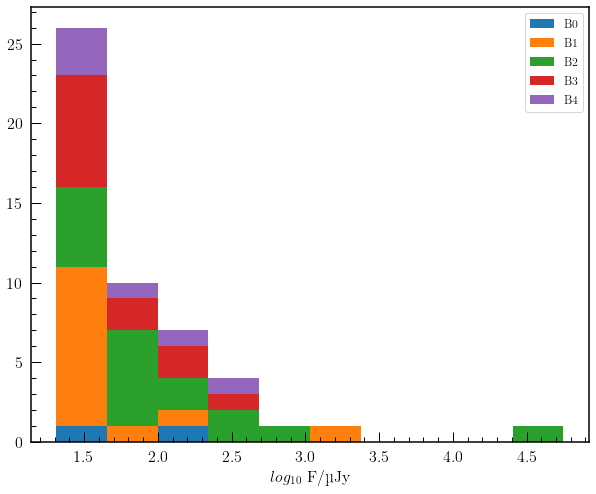

In [16]:
sc_ordciv_intflux, sc_mask = order_civ(int_flux, bins)
plt.figure(figsize=(10,8))
plt.hist(sc_ordciv_intflux[sc_mask], stacked=True, label=labels[sc_mask])
plt.xlabel("$log_{10}$ F/µJy")
plt.legend(loc="best")

#plt.savefig("../Graphs/RM_CIV_Ordering/scaled_bins.png")

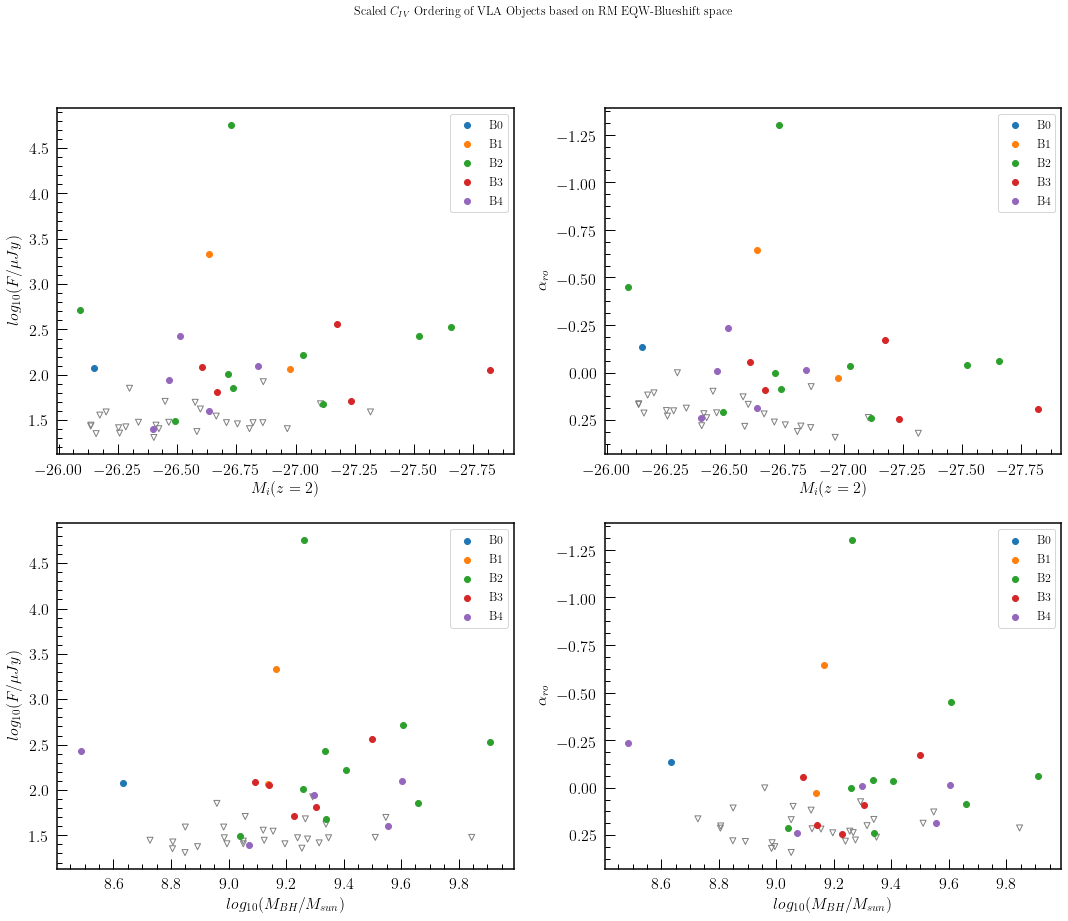

In [17]:
fig, axs = plt.subplots(2, 2, figsize=(18,14))
plt.suptitle("Scaled $C_{IV}$ Ordering of VLA Objects based on RM EQW-Blueshift space")

binplot([axs[0,0], axs[0,1]], Miz2, bins, '$M_i(z=2)$', True)
binplot([axs[1,0], axs[1,1]], log_bh, bins, '$log_{10} (M_{BH} / M_{sun})$')

#plt.savefig("../Graphs/RM_CIV_Ordering/civorder_scaled_Miz2_and_Mbh_alldata.png")

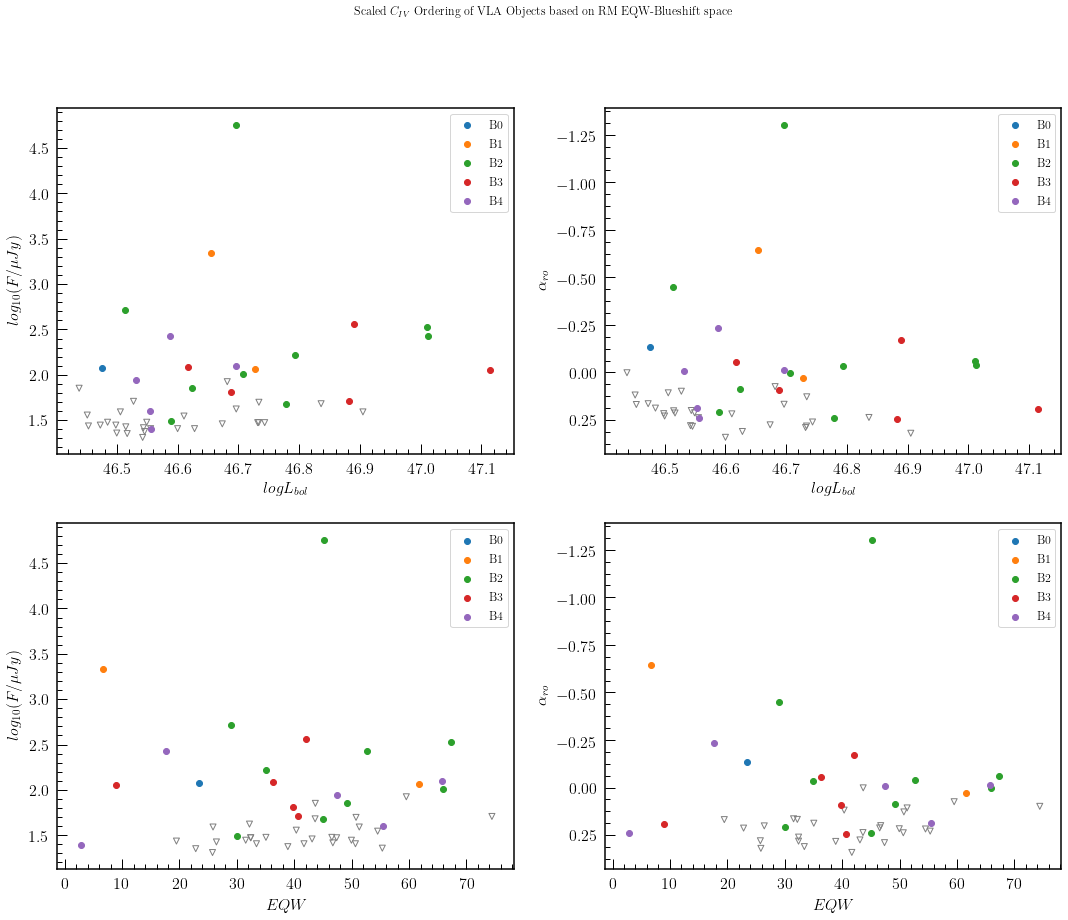

In [18]:
fig, axs = plt.subplots(2, 2, figsize=(18,14))
plt.suptitle("Scaled $C_{IV}$ Ordering of VLA Objects based on RM EQW-Blueshift space")

binplot([axs[0,0], axs[0,1]], logL_bol, bins, '$log L_{bol}$')
binplot([axs[1,0], axs[1,1]], ew_civ, bins, '$EQW$')

#plt.savefig("../Graphs/RM_CIV_Ordering/civorder_scaled_Lbol_and_EQW_alldata.png")

### Now compare RL detections with RQ detections separately

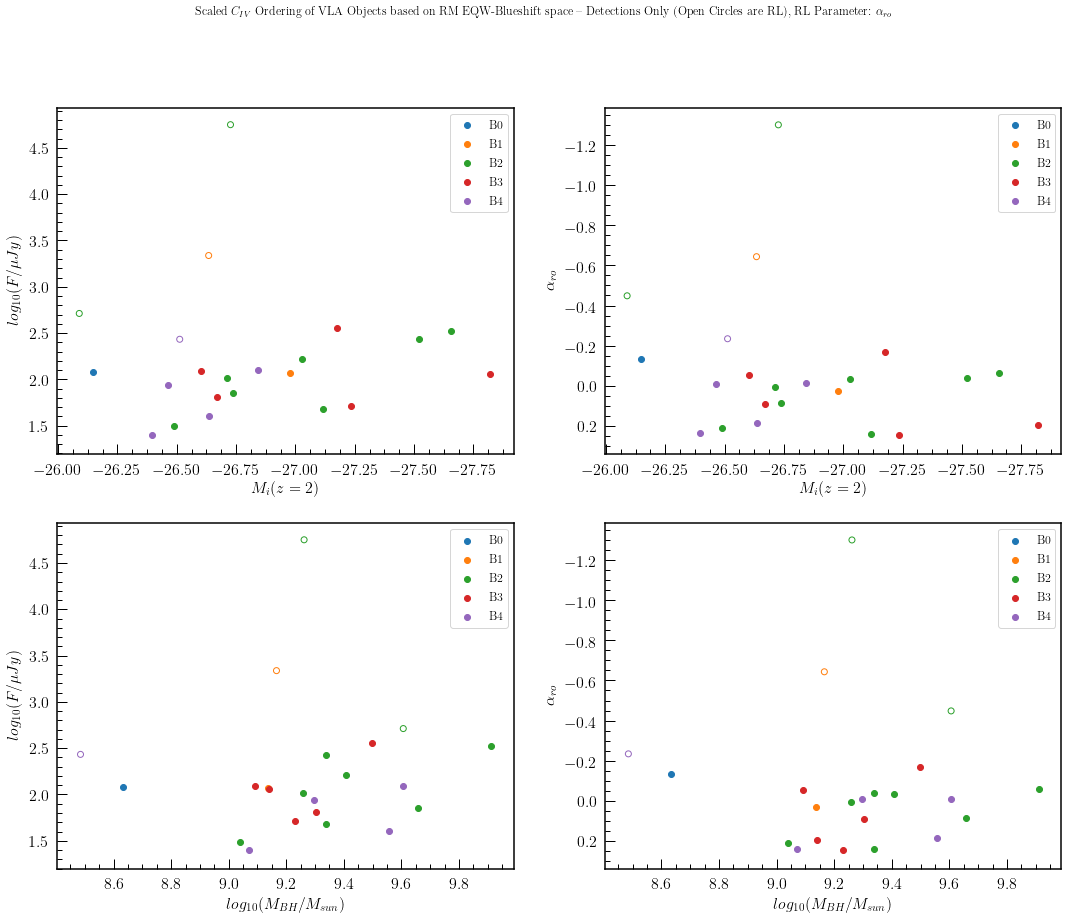

In [19]:
fig, axs = plt.subplots(2, 2, figsize=(18,14))
plt.suptitle("Scaled $C_{{IV}}$ Ordering of VLA Objects based on RM EQW-Blueshift space -- Detections Only (Open Circles are RL), RL Parameter: {}".format(RLpar))

binplot([axs[0,0], axs[0,1]], Miz2, bins, '$M_i(z=2)$', True, True)
binplot([axs[1,0], axs[1,1]], log_bh, bins, '$log_{10} (M_{BH} / M_{sun})$', sound=True)

#plt.savefig("../Graphs/RM_CIV_Ordering/civorder_scaled_Miz2_and_Mbh_RQvRL_alpharo.png")

Open circles are RL -- can change RLness parameter in cell [3] above (Flux/alpha_ro).  Brighter sources at the 'end' of the group of data trending rightwards in the lower half of plots are the points that change when varying this parameter -- flux acts as a softer RL cutoff, and so these points are RL based on flux, but not $\alpha_{ro}$

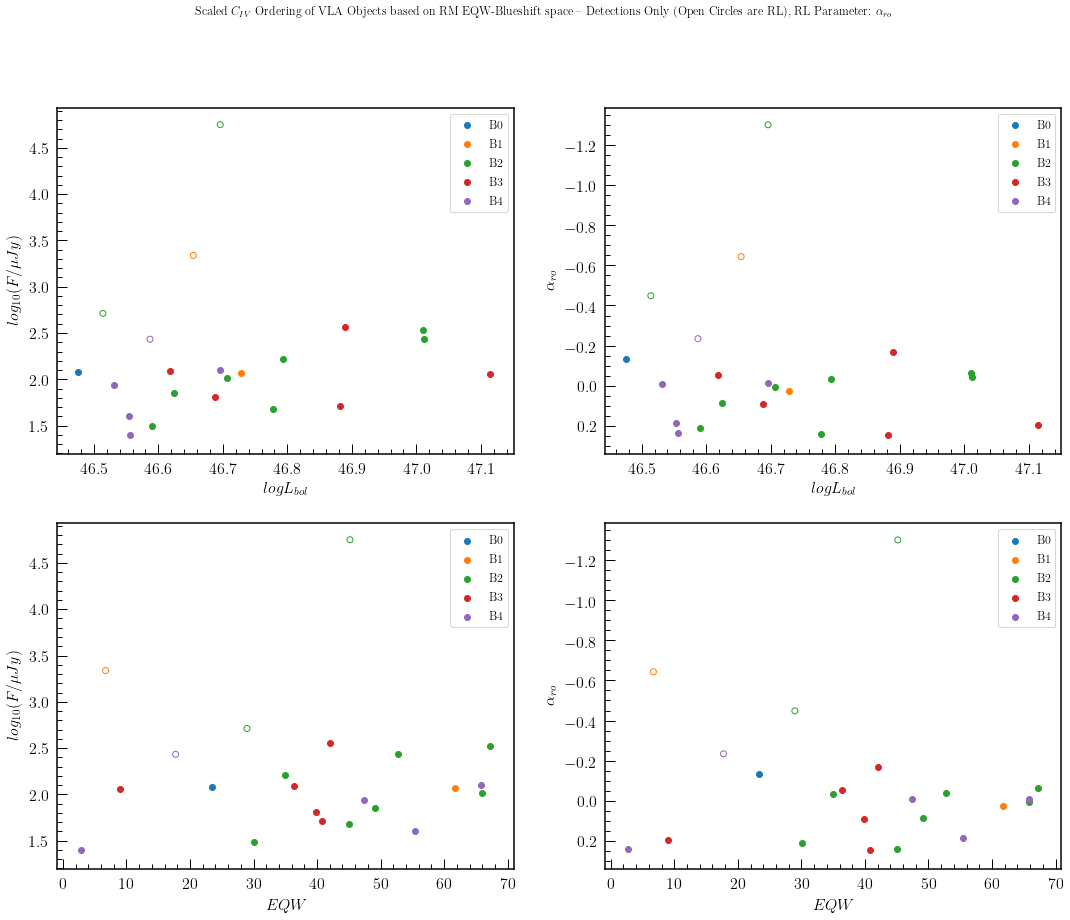

In [20]:
fig, axs = plt.subplots(2, 2, figsize=(18,14))
plt.suptitle("Scaled $C_{{IV}}$ Ordering of VLA Objects based on RM EQW-Blueshift space -- Detections Only (Open Circles are RL), RL Parameter: {}".format(RLpar))

binplot([axs[0,0], axs[0,1]], logL_bol, bins, '$log L_{bol}$', sound=True)
binplot([axs[1,0], axs[1,1]], ew_civ, bins, '$EQW$', sound=True)

#plt.savefig("../Graphs/RM_CIV_Ordering/civorder_scaled_Lbol_and_EQW_RQvRL_alpharo.png")